In [1]:
# IMPORT NEEDED PACKAGES
# need pandas to read in data
# the other packages are for data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
# import the data
heights = pd.read_csv('data/heights.csv')

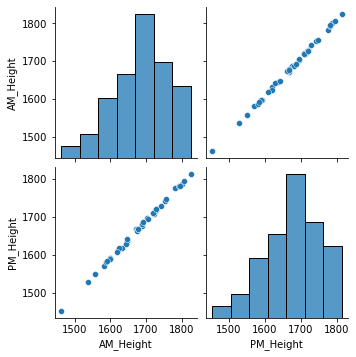

In [3]:
# plot the data
sns.pairplot(heights)

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AM_Height', ylabel='Density'>

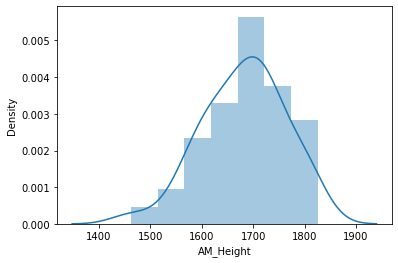

In [26]:
# plot X with normal distribution curve on it
sns.distplot(heights['AM_Height'])

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM_Height', ylabel='Density'>

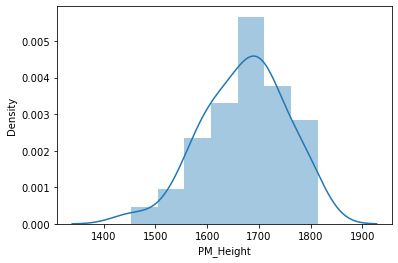

In [27]:
# plot Y with normal distribution curve on it
sns.distplot(heights['PM_Height'])

In [7]:
# BUILDING A MODEL
# first need to assign your variables to x and y
x = heights['AM_Height']
y = heights['PM_Height']

In [8]:
# build your model
model = sm.OLS(y,x).fit()

In [9]:
# TEST FOR HOMOSCEDASTICITY

pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

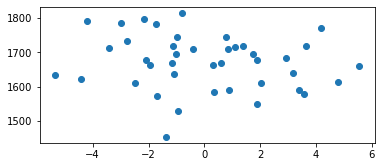

In [10]:
# graph your residuals 
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [11]:
# double check with statsmodels package - Breusch Pagan test
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.281807808595943, nan, 29.145236144699442, 3.3000372410769865e-06)

In [12]:
# double check with statsmodels package - Harvey Collier test
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

In [13]:
# Box-Cox Transformation 
transformed, _ = boxcox(heights['AM_Height'])


(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

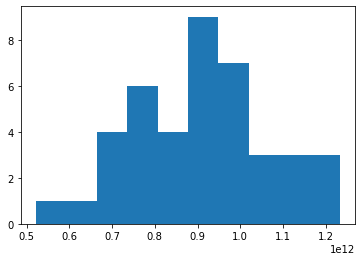

In [14]:
# plot histogram of transformed values
plt.hist(transformed)

In [15]:
# pull values into a model and re-run tests for homoscedasticity
# reassign x as transformed
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2347.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                    3.84e-37
Time:                        00:37:36   Log-Likelihood:                         -278.68
No. Observations:                  41   AIC:                                      559.4
Df Residuals:                      40   BIC:                                      561.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            1.8e-09   3.71e-11     48.450      0.000    1.72e-09    1.87e-09
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.516
Skew:                          -0.105   Prob(JB):                        0.773
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# create new residual values
pred_val = model1.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

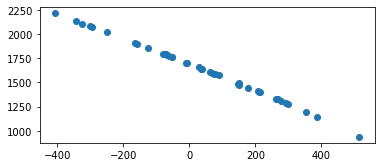

In [17]:
# graph your residuals 
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [18]:
# testing for multicollinearity
heights.corr()

,AM_Height,PM_Height
AM_Height,1.000000,0.999466
PM_Height,0.999466,1.000000


<AxesSubplot:>

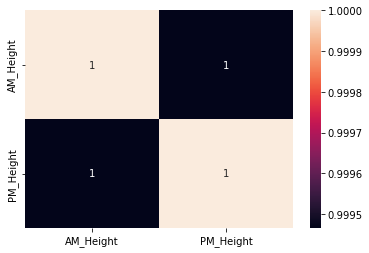

In [19]:
# plot as heat map
sns.heatmap(heights.corr(), annot=True)

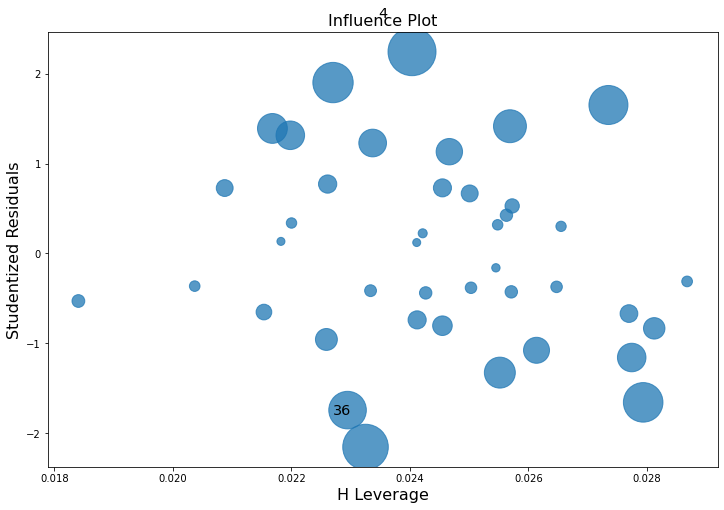

In [20]:
# screening for outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [21]:
# Double check your values with a table
infl = model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.085810  0.007499        0.532882  0.025727         0.086594   
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

In [22]:
# INTERPRETING THE REGRESSION OUTPUT
# call up summary of your regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                   5.17e-114
Time:                        00:38:30   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""